<a href="https://colab.research.google.com/github/vatsaljoshi-11/water_quality_data/blob/main/INDIAN_WATER_QUALITY_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project analyzes Indian water quality data through data cleaning, EDA, and visualization. It explores temperature trends, WQI insights, and uses logistic regression, decision trees, and the SARIMA model for prediction. The goal is to assess and forecast water quality in India.

Group Project by:
Vatsal Joshi - 230107034
Tushar Soni -  230122059

# Reference for WQI calculation and classification criteria:
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10006569/
# https://www.intechopen.com/chapters/63689

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
from google.colab import files

In [ ]:
#importing the data from my github
url = 'https://raw.githubusercontent.com/Indiapal/Water-Quality/main/water_dataX.csv'
India_df = pd.read_csv(url, encoding= 'unicode_escape')

In [ ]:
# save the csv

India_df.to_csv('water_quality.csv')
#files.download('water_quality.csv')


#The following cells are to be executed only when uploading the dataset from device

In [ ]:
#to be executed only when uploading the dataset from device
uploaded = files.upload()

Saving water_dataX.csv to water_dataX.csv


In [ ]:
#to be executed only when uploading the dataset from device
#!pip install chardet
import chardet
with open("water_dataX.csv", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]

In [ ]:
#to be executed only when uploading the dataset from device
India_df = pd.read_csv('water_dataX.csv',encoding=encoding)

#Information about the data

In [ ]:
India_df

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NAN,7.9,738,7.2,2.7,0.518,0.518,202,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29,7.5,585,6.3,2.6,0.155,0.155,315,2003
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28,7.6,98,6.2,1.2,NAN,NAN,570,2003
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28,7.7,91,6.5,1.3,NAN,NAN,562,2003


In [ ]:
India_df.dtypes

,0
STATION CODE,object
LOCATIONS,object
STATE,object
Temp,object
D.O. (mg/l),object
PH,object
CONDUCTIVITY (µmhos/cm),object
B.O.D. (mg/l),object
NITRATENAN N+ NITRITENANN (mg/l),object
FECAL COLIFORM (MPN/100ml),object


In [ ]:
India_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1991 non-null   object
 1   LOCATIONS                         1991 non-null   object
 2   STATE                             1991 non-null   object
 3   Temp                              1991 non-null   object
 4   D.O. (mg/l)                       1991 non-null   object
 5   PH                                1991 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 7   B.O.D. (mg/l)                     1991 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
 11  year                              1991 non-null   int64 
dtypes: int64(1), object(

# Data Cleaning and Pre-Processing

In [ ]:
#coverting object data to numeric data
India_df['Temp'] = pd.to_numeric(India_df['Temp'], errors='coerce')
India_df['D.O. (mg/l)'] = pd.to_numeric(India_df['D.O. (mg/l)'], errors='coerce')
India_df['PH'] = pd.to_numeric(India_df['PH'], errors='coerce')
India_df['CONDUCTIVITY (µmhos/cm)'] = pd.to_numeric(India_df['CONDUCTIVITY (µmhos/cm)'], errors='coerce')
India_df['B.O.D. (mg/l)'] = pd.to_numeric(India_df['B.O.D. (mg/l)'], errors='coerce')
India_df['NITRATENAN N+ NITRITENANN (mg/l)'] = pd.to_numeric(India_df['NITRATENAN N+ NITRITENANN (mg/l)'], errors='coerce')
India_df['FECAL COLIFORM (MPN/100ml)'] = pd.to_numeric(India_df['FECAL COLIFORM (MPN/100ml)'], errors='coerce')
India_df['TOTAL COLIFORM (MPN/100ml)Mean'] = pd.to_numeric(India_df['TOTAL COLIFORM (MPN/100ml)Mean'], errors='coerce')


In [ ]:
India_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   STATION CODE                      1991 non-null   object 
 1   LOCATIONS                         1991 non-null   object 
 2   STATE                             1991 non-null   object 
 3   Temp                              1899 non-null   float64
 4   D.O. (mg/l)                       1960 non-null   float64
 5   PH                                1983 non-null   float64
 6   CONDUCTIVITY (µmhos/cm)           1966 non-null   float64
 7   B.O.D. (mg/l)                     1948 non-null   float64
 8   NITRATENAN N+ NITRITENANN (mg/l)  1766 non-null   float64
 9   FECAL COLIFORM (MPN/100ml)        1675 non-null   float64
 10  TOTAL COLIFORM (MPN/100ml)Mean    1859 non-null   float64
 11  year                              1991 non-null   int64  
dtypes: flo

In [ ]:
India_df.isna()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,False,False,False,True,False,False,False,False,False,False,False,False
1987,False,False,False,False,False,False,False,False,False,False,False,False
1988,False,False,False,False,False,False,False,False,True,True,False,False
1989,False,False,False,False,False,False,False,False,True,True,False,False


In [ ]:
#Converting NAN object to np.nan
India_df = India_df.replace('NAN', np.nan)


In [ ]:
# Checking for missing values
India_df.isnull().sum().sort_values()

year                                  0
PH                                    8
CONDUCTIVITY (µmhos/cm)              25
D.O. (mg/l)                          31
B.O.D. (mg/l)                        43
Temp                                 92
STATION CODE                        122
TOTAL COLIFORM (MPN/100ml)Mean      132
LOCATIONS                           184
NITRATENAN N+ NITRITENANN (mg/l)    225
FECAL COLIFORM (MPN/100ml)          316
STATE                               761
dtype: int64

In [ ]:
# only for numeric data replacing NULL values with median of column

India_df_num = India_df.select_dtypes(include=[np.number])
India_df_num_copy = India_df_num.copy()
India_df_num_copy = India_df_num_copy.fillna(India_df_num_copy.median())


In [ ]:
India_df_num_copy.isnull().sum().sort_values()

Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
dtype: int64

In [ ]:
# if "LOCATIONS" or "STATE" is missing, take "STATION CODE" and check for other data with same "STATION CODE". Same "STATION CODE" means same "STATE"

df = India_df
def find_state_by_station_code(df):
  for i in range(len(df)):
    if pd.isnull(df.loc[i, 'LOCATIONS']) or pd.isnull(df.loc[i, 'STATE']):
      station_code = df.loc[i, 'STATION CODE']
      other_data = df[df['STATION CODE'] == station_code]
      if len(other_data) > 0:
        state = other_data['STATE'].iloc[0]
        df.loc[i, 'STATE'] = state
  return df

df = find_state_by_station_code(df)


In [ ]:
df.isnull().sum().sort_values()

year                                  0
PH                                    8
CONDUCTIVITY (µmhos/cm)              25
D.O. (mg/l)                          31
B.O.D. (mg/l)                        43
Temp                                 92
STATION CODE                        122
STATE                               130
TOTAL COLIFORM (MPN/100ml)Mean      132
LOCATIONS                           184
NITRATENAN N+ NITRITENANN (mg/l)    225
FECAL COLIFORM (MPN/100ml)          316
dtype: int64

In [ ]:
#replace missing "LOCATIONS" in df by the corresponding "STATE" column value
df['LOCATIONS'] = df.apply(lambda row: row['STATE'] if pd.isnull(row['LOCATIONS']) else row['LOCATIONS'], axis=1)
df.isnull().sum().sort_values()

year                                  0
LOCATIONS                             3
PH                                    8
CONDUCTIVITY (µmhos/cm)              25
D.O. (mg/l)                          31
B.O.D. (mg/l)                        43
Temp                                 92
STATION CODE                        122
STATE                               130
TOTAL COLIFORM (MPN/100ml)Mean      132
NITRATENAN N+ NITRITENANN (mg/l)    225
FECAL COLIFORM (MPN/100ml)          316
dtype: int64

In [ ]:
# Extract the "STATE" value from the "LOCATIONS" column(from last "," till end)
dfcpy=df
df['STATE'] = df['LOCATIONS'].str.split(',').str[-1]
dfcpy.isnull().sum().sort_values()

year                                  0
LOCATIONS                             3
STATE                                 3
PH                                    8
CONDUCTIVITY (µmhos/cm)              25
D.O. (mg/l)                          31
B.O.D. (mg/l)                        43
Temp                                 92
STATION CODE                        122
TOTAL COLIFORM (MPN/100ml)Mean      132
NITRATENAN N+ NITRITENANN (mg/l)    225
FECAL COLIFORM (MPN/100ml)          316
dtype: int64

In [ ]:
#Replacing missing "STATION CODE" with the other row "STATION CODE" having same "STATE" value as same state has the same station code
def find_station_code_by_state(df):
  for i in range(len(df)):
    if pd.isnull(df.loc[i, 'STATION CODE']):
      state = df.loc[i, 'STATE']
      other_data = df[df['STATE'] == state]
      if len(other_data) > 0:
        station_code = other_data['STATION CODE'].iloc[0]
        df.loc[i, 'STATION CODE'] = station_code
  return df

dfcpy = find_station_code_by_state(dfcpy)

In [ ]:
dfcpy.isnull().sum().sort_values()

year                                  0
LOCATIONS                             3
STATE                                 3
STATION CODE                          4
PH                                    8
CONDUCTIVITY (µmhos/cm)              25
D.O. (mg/l)                          31
B.O.D. (mg/l)                        43
Temp                                 92
TOTAL COLIFORM (MPN/100ml)Mean      132
NITRATENAN N+ NITRITENANN (mg/l)    225
FECAL COLIFORM (MPN/100ml)          316
dtype: int64

In [ ]:
# compile all into one final df
df_final = pd.concat([dfcpy[['STATION CODE', 'LOCATIONS', 'STATE']], India_df_num_copy], axis=1)
df_final.isnull().sum().sort_values()

Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
LOCATIONS                           3
STATE                               3
STATION CODE                        4
dtype: int64

In [ ]:
df_final

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN,30.6,6.7,7.5,203.0,1.8965,0.100,11.000,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0000,0.200,4953.000,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,ZUARI AT PANCHAWADI,29.5,6.3,6.9,179.0,1.7000,0.100,3243.000,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,RIVER ZUARI AT BORIM BRIDGE,29.7,5.8,6.9,64.0,3.8000,0.500,5382.000,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,RIVER ZUARI AT MARCAIM JETTY,29.5,5.8,7.3,83.0,1.9000,0.400,3428.000,5500.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,27.0,7.9,738.0,7.2,2.7000,0.518,0.518,202.0,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,29.0,7.5,585.0,6.3,2.6000,0.155,0.155,315.0,2003
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,28.0,7.6,98.0,6.2,1.2000,0.516,221.000,570.0,2003
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,28.0,7.7,91.0,6.5,1.3000,0.516,221.000,562.0,2003


In [ ]:
# remove the remaining na

df=df_final.dropna()
df

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN,30.6,6.7,7.5,203.0,1.8965,0.100,11.000,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0000,0.200,4953.000,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,ZUARI AT PANCHAWADI,29.5,6.3,6.9,179.0,1.7000,0.100,3243.000,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,RIVER ZUARI AT BORIM BRIDGE,29.7,5.8,6.9,64.0,3.8000,0.500,5382.000,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,RIVER ZUARI AT MARCAIM JETTY,29.5,5.8,7.3,83.0,1.9000,0.400,3428.000,5500.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,27.0,7.9,738.0,7.2,2.7000,0.518,0.518,202.0,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,29.0,7.5,585.0,6.3,2.6000,0.155,0.155,315.0,2003
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,28.0,7.6,98.0,6.2,1.2000,0.516,221.000,570.0,2003
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,28.0,7.7,91.0,6.5,1.3000,0.516,221.000,562.0,2003


#Exploratory Data Analysis

# **Heres a Tableau Dashboard Link for better visualisation:**
### https://public.tableau.com/views/IndianWaterQualityData/Sheet1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

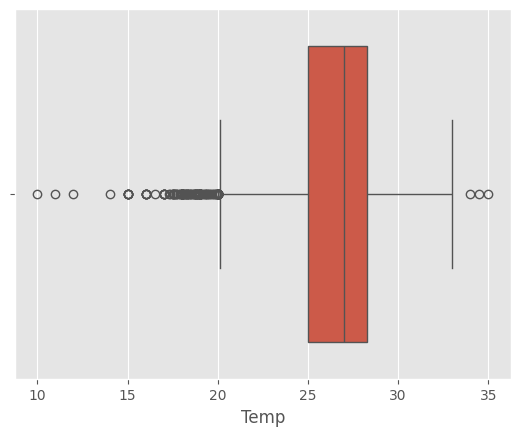

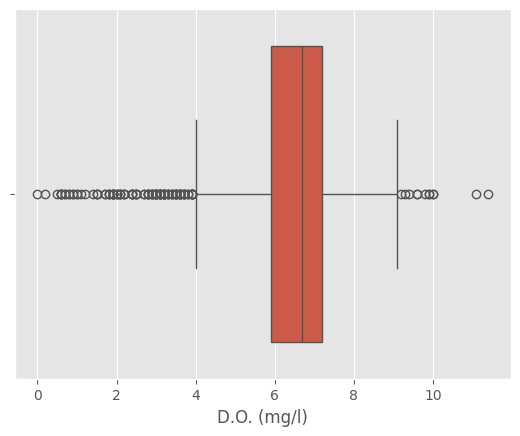

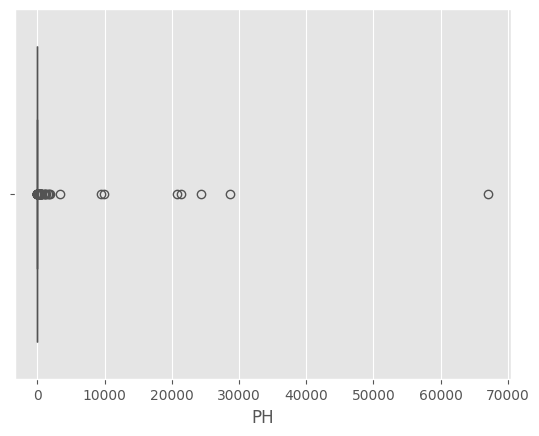

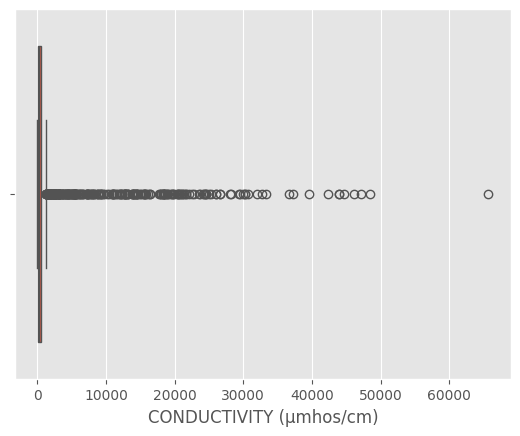

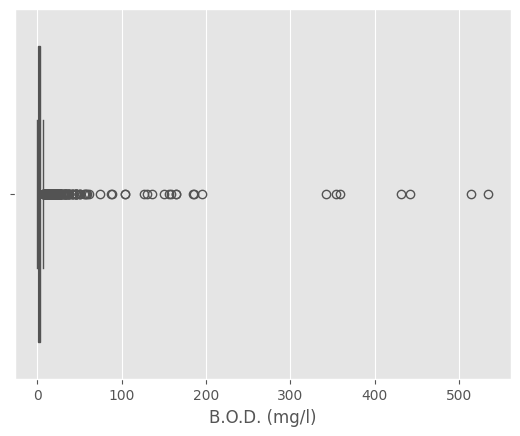

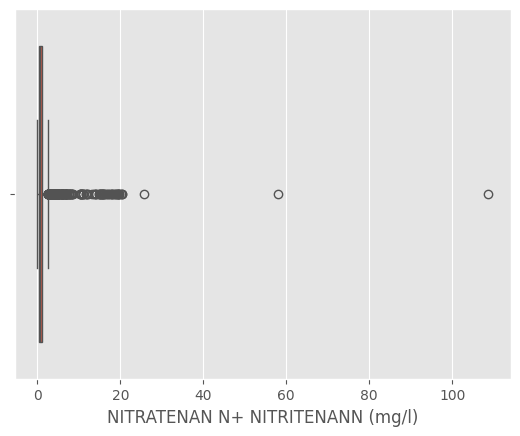

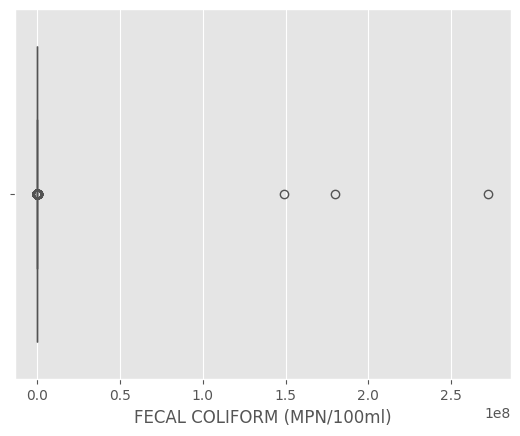

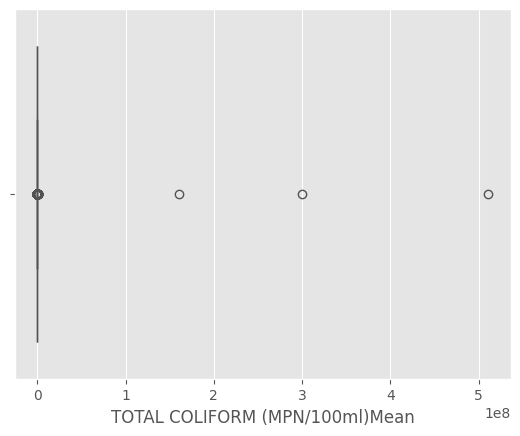

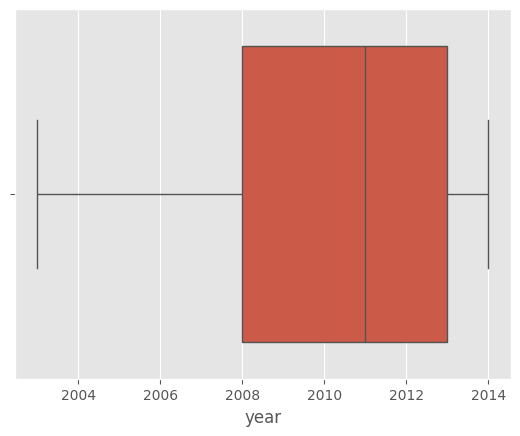

In [ ]:
# find outliers

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Create a boxplot for each numeric column
for col in df.select_dtypes(include=[np.number]):
  sns.boxplot(x=df[col])
  plt.show()


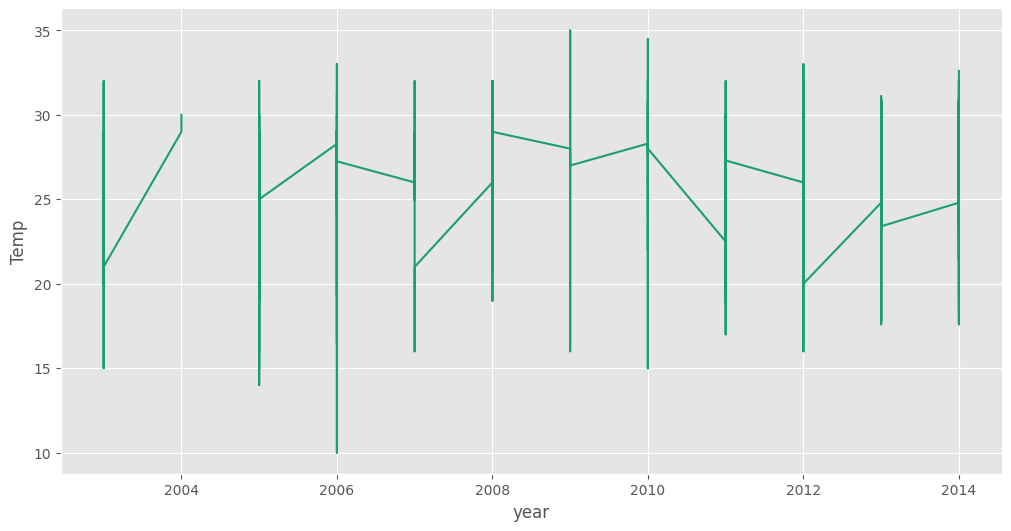

In [ ]:
#temperature vs year
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['Temp']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = India_df.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('Temp')

<Axes: title={'center': 'Dissolved Oxygen vs Temperature over time'}, xlabel='Temp', ylabel='D.O. (mg/l)'>

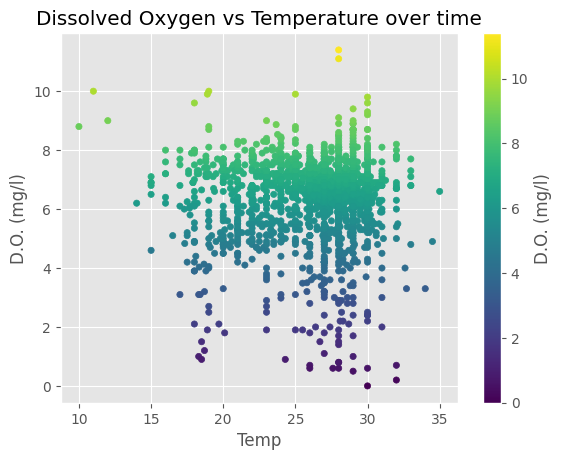

In [ ]:
df.plot.scatter(x='Temp', y='D.O. (mg/l)', c='D.O. (mg/l)', title='Dissolved Oxygen vs Temperature over time')

In [ ]:
#renaming columns
df.columns = ['station','location','state','temp','do','ph','co','bod','na','fc','tc','year']

In [ ]:
df.head()

,station,location,state,temp,do,ph,co,bod,na,fc,tc,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN,30.6,6.7,7.5,203.0,1.8965,0.1,11.0,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0000,0.2,4953.0,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,ZUARI AT PANCHAWADI,29.5,6.3,6.9,179.0,1.7000,0.1,3243.0,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,RIVER ZUARI AT BORIM BRIDGE,29.7,5.8,6.9,64.0,3.8000,0.5,5382.0,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,RIVER ZUARI AT MARCAIM JETTY,29.5,5.8,7.3,83.0,1.9000,0.4,3428.0,5500.0,2014


In [ ]:
# Normalizing the important columns to a scale of 0 to 100
# Calculation of normalized pH
df['npH'] = df['ph'].apply(lambda x: (
    100 if (8.5 >= x >= 7)
    else (80 if (8.6 >= x >= 8.5) or (6.9 >= x >= 6.8)
          else (60 if (8.8 >= x >= 8.6) or (6.8 >= x >= 6.7)
                else (40 if (9 >= x >= 8.8) or (6.7 >= x >= 6.5) else 0)))))

# Calculation of normalized dissolved oxygen
df['ndo'] = df['do'].apply(lambda x: (
    100 if (x >= 6)
    else (80 if (6 >= x >= 5.1)
          else (60 if (5 >= x >= 4.1)
                else (40 if (4 >= x >= 3) else 0)))))

# Calculation of normalized total coliform
df['nco'] = df['tc'].apply(lambda x: (
    100 if (5 >= x >= 0)
    else (80 if (50 >= x >= 5)
          else (60 if (500 >= x >= 50)
                else (40 if (10000 >= x >= 500) else 0)))))

# Calculation of normalized fecal matter
df['nfc'] = df['fc'].apply(lambda x: (
    100 if (5 >= x >= 0)
    else (80 if (50 >= x >= 5)
          else (60 if (500 >= x >= 50)
                else (40 if (10000 >= x >= 500) else 0)))))

# Calculation of normalized B.O.D.
df['nbdo'] = df['bod'].apply(lambda x: (
    100 if (3 >= x >= 0)
    else (80 if (6 >= x >= 3)
          else (60 if (80 >= x >= 6)
                else (40 if (125 >= x >= 80) else 0)))))

# Calculation of normalized electrical conductivity
df['nec'] = df['co'].apply(lambda x: (
    100 if (75 >= x >= 0)
    else (80 if (150 >= x >= 75)
          else (60 if (225 >= x >= 150)
                else (40 if (300 >= x >= 225) else 0)))))


# Calculation of normalized nitrate
df['nna'] = df['na'].apply(lambda x: (
    100 if (20 >= x >= 0)
    else (80 if (50 >= x >= 20)
          else (60 if (100 >= x >= 50)
                else (40 if (200 >= x >= 100) else 0)))))


In [ ]:
df

,station,location,state,temp,do,ph,co,bod,na,fc,tc,year,npH,ndo,nco,nfc,nbdo,nec,nna
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN,30.6,6.7,7.5,203.0,1.8965,0.100,11.000,27.0,2014,100,100,80,80,100,60,100
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0000,0.200,4953.000,8391.0,2014,100,80,40,40,100,60,100
2,1475,ZUARI AT PANCHAWADI,ZUARI AT PANCHAWADI,29.5,6.3,6.9,179.0,1.7000,0.100,3243.000,5330.0,2014,80,100,40,40,100,60,100
3,3181,RIVER ZUARI AT BORIM BRIDGE,RIVER ZUARI AT BORIM BRIDGE,29.7,5.8,6.9,64.0,3.8000,0.500,5382.000,8443.0,2014,80,80,40,40,80,100,100
4,3182,RIVER ZUARI AT MARCAIM JETTY,RIVER ZUARI AT MARCAIM JETTY,29.5,5.8,7.3,83.0,1.9000,0.400,3428.000,5500.0,2014,100,80,40,40,100,80,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,27.0,7.9,738.0,7.2,2.7000,0.518,0.518,202.0,2003,0,100,60,100,100,100,100
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,29.0,7.5,585.0,6.3,2.6000,0.155,0.155,315.0,2003,0,100,60,100,100,100,100
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,28.0,7.6,98.0,6.2,1.2000,0.516,221.000,570.0,2003,0,100,40,60,100,100,100
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,28.0,7.7,91.0,6.5,1.3000,0.516,221.000,562.0,2003,0,100,40,60,100,100,100


In [ ]:
# Applying weights
df['wph'] = df['npH'] * 0.165
df['wdo'] = df['ndo'] * 0.281
df['wbdo'] = df['nbdo'] * 0.234
df['wec'] = df['nec'] * 0.009
df['wna'] = df['nna'] * 0.028
df['wco'] = df['nco'] * 0.281

# Calculating Water Quality Index (WQI)
df['wqi'] = df['wph'] + df['wdo'] + df['wbdo'] + df['wec'] + df['wna'] + df['wco']

In [ ]:
df

,station,location,state,temp,do,ph,co,bod,na,fc,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN,30.6,6.7,7.5,203.0,1.8965,0.100,11.000,...,100,60,100,16.5,28.10,23.40,0.54,2.8,22.48,93.82
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0000,0.200,4953.000,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,1475,ZUARI AT PANCHAWADI,ZUARI AT PANCHAWADI,29.5,6.3,6.9,179.0,1.7000,0.100,3243.000,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,RIVER ZUARI AT BORIM BRIDGE,29.7,5.8,6.9,64.0,3.8000,0.500,5382.000,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,RIVER ZUARI AT MARCAIM JETTY,29.5,5.8,7.3,83.0,1.9000,0.400,3428.000,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,27.0,7.9,738.0,7.2,2.7000,0.518,0.518,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,29.0,7.5,585.0,6.3,2.6000,0.155,0.155,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,28.0,7.6,98.0,6.2,1.2000,0.516,221.000,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,28.0,7.7,91.0,6.5,1.3000,0.516,221.000,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44


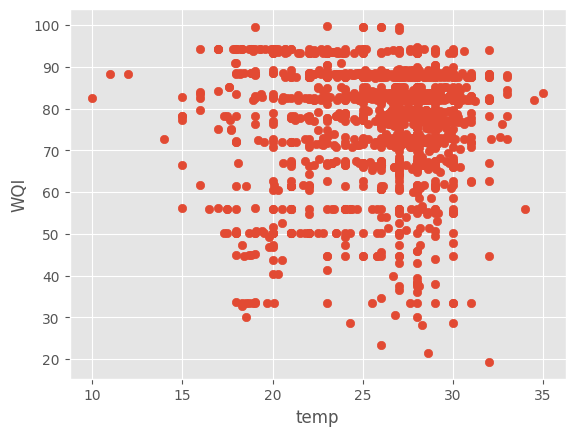

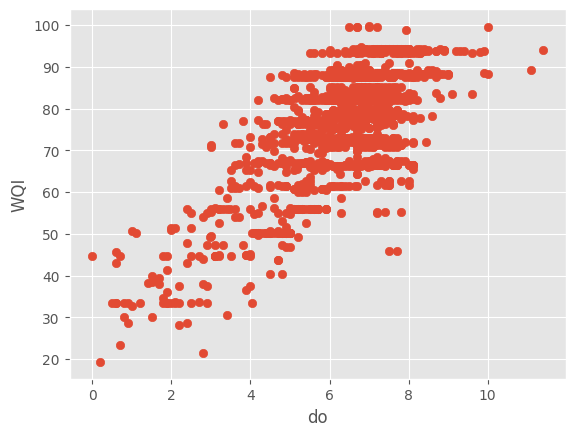

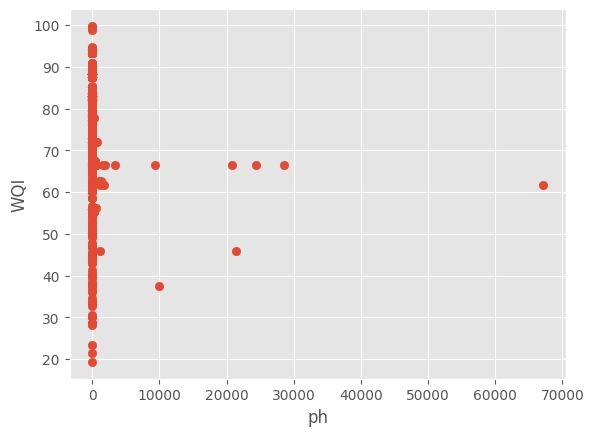

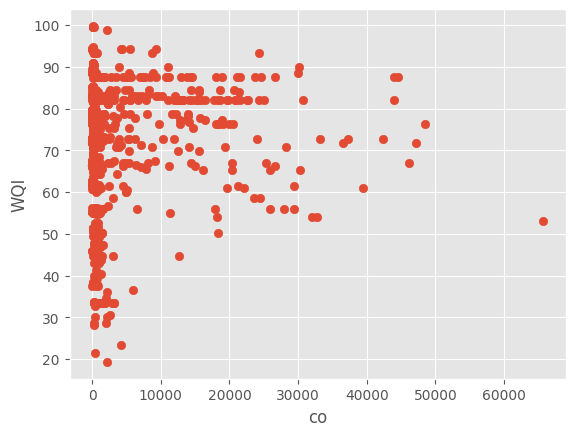

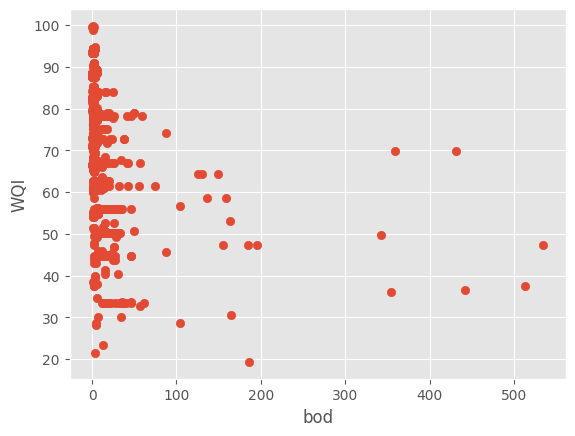

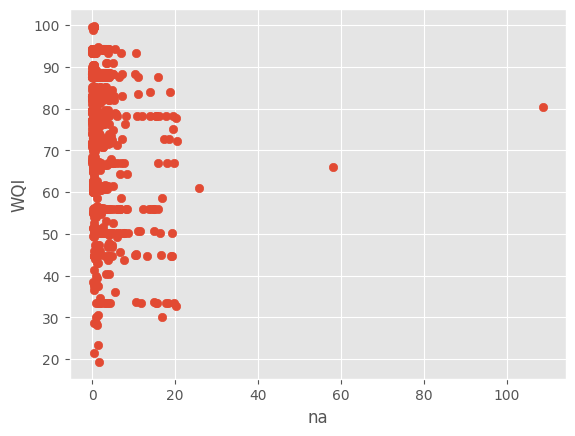

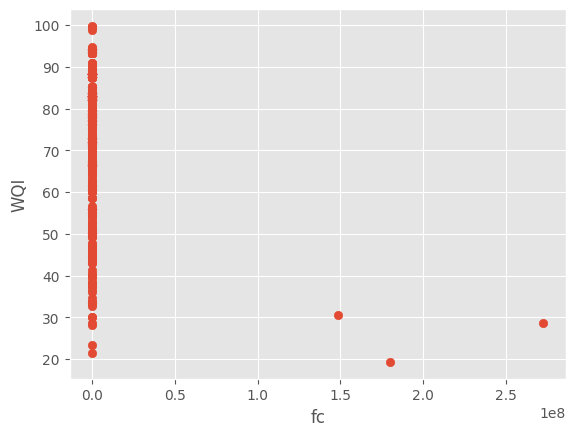

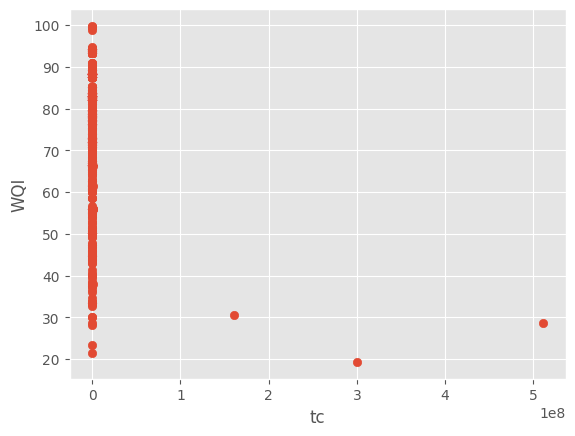

In [ ]:
import matplotlib.pyplot as plt
# WQI vs all other column plot
columns = ['temp', 'do', 'ph', 'co', 'bod', 'na', 'fc', 'tc']

for column in columns:
  plt.scatter(df[column], df['wqi'])
  plt.xlabel(column)
  plt.ylabel('WQI')
  plt.show()

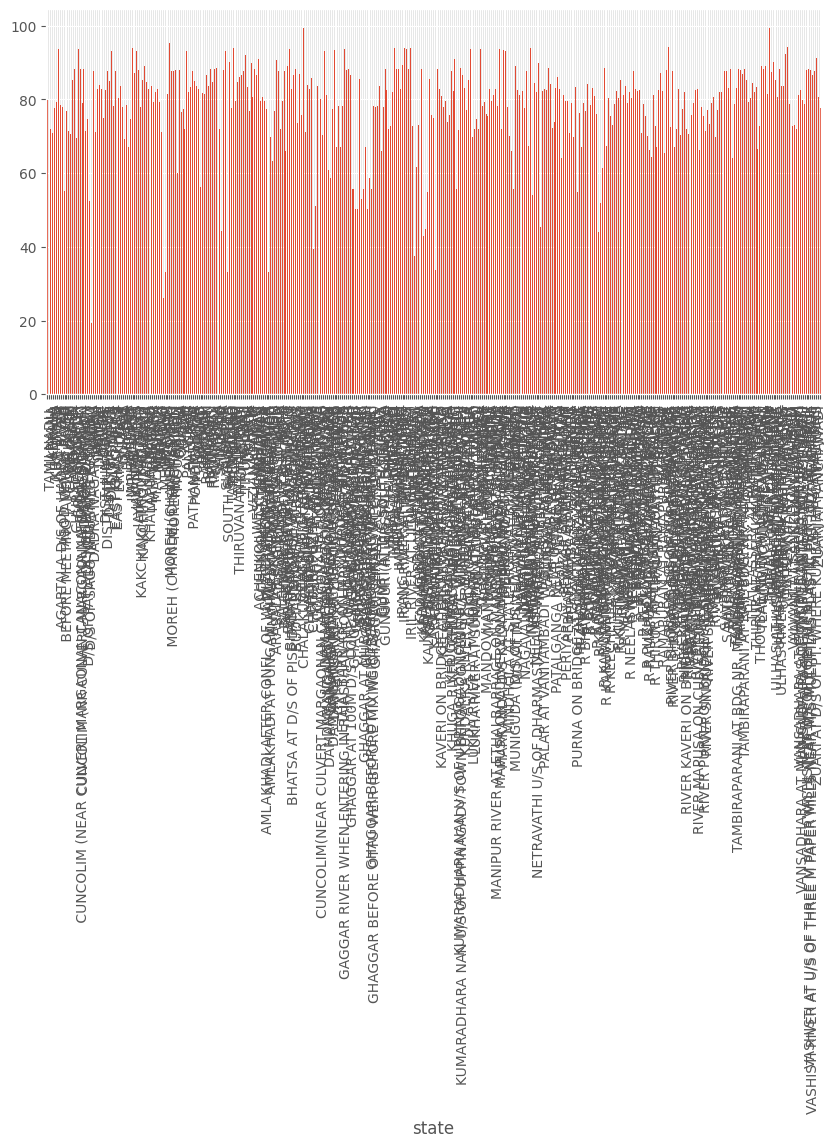

In [ ]:
import matplotlib.pyplot as plt
df.groupby('state')['wqi'].mean().plot(kind='bar', figsize=(10, 5))
plt.show()


<Axes: xlabel='location', ylabel='wqi'>

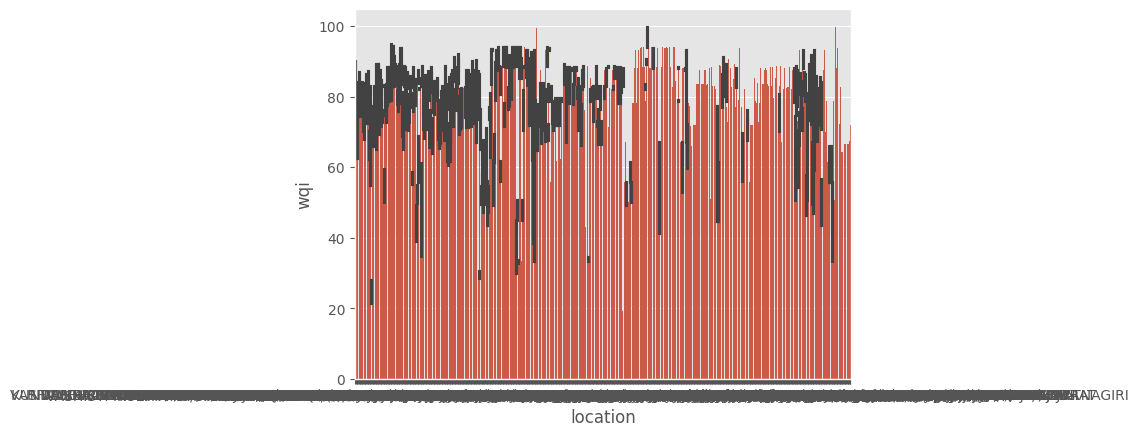

In [ ]:
sns.barplot(x = 'location', y = 'wqi', data = df)

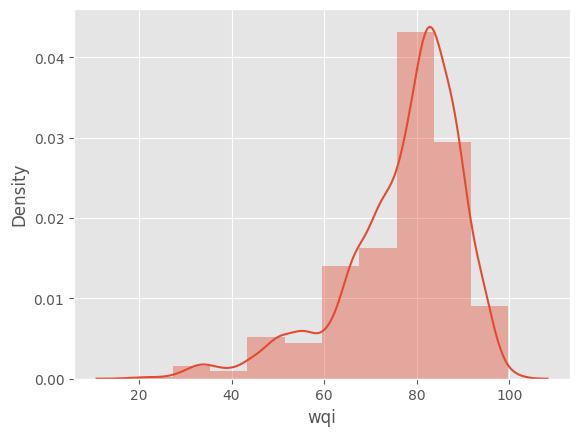

In [ ]:
# wqi distribution

import matplotlib.pyplot as plt
sns.distplot(df['wqi'], bins=10)
plt.show()


# There are a lot of things we can do with WQI data, one of that is Purpose vs Suitability Classification. Here we will grade water into 5 categories and train a model to predict the water category from the water data

Reference: 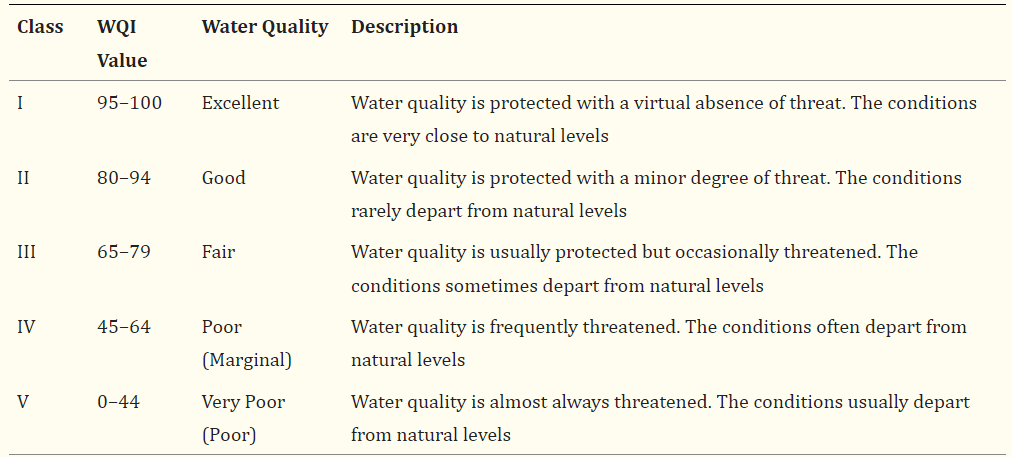

In [ ]:
df

,station,location,state,temp,do,ph,co,bod,na,fc,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN,30.6,6.7,7.5,203.0,1.8965,0.100,11.000,...,100,60,100,16.5,28.10,23.40,0.54,2.8,22.48,93.82
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0000,0.200,4953.000,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,1475,ZUARI AT PANCHAWADI,ZUARI AT PANCHAWADI,29.5,6.3,6.9,179.0,1.7000,0.100,3243.000,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,RIVER ZUARI AT BORIM BRIDGE,29.7,5.8,6.9,64.0,3.8000,0.500,5382.000,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,RIVER ZUARI AT MARCAIM JETTY,29.5,5.8,7.3,83.0,1.9000,0.400,3428.000,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,27.0,7.9,738.0,7.2,2.7000,0.518,0.518,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,29.0,7.5,585.0,6.3,2.6000,0.155,0.155,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,28.0,7.6,98.0,6.2,1.2000,0.516,221.000,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,28.0,7.7,91.0,6.5,1.3000,0.516,221.000,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44


In [ ]:
# save this to excel file and download
df.to_excel('output.xlsx', sheet_name='sheet1', index=False)
files.download('output.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

WQI Grading

In [ ]:
df["wqi_grade"] = df["wqi"].apply(lambda x: (4 if (x <= 44)
                                        else(3 if (44<x<=64)
                                        else(2 if (64<x<=79)
                                        else(1 if (79<x<=94)
                                        else 0)))))

In [ ]:
df

,station,location,state,temp,do,ph,co,bod,na,fc,...,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi,wqi_grade
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN,30.6,6.7,7.5,203.0,1.8965,0.100,11.000,...,60,100,16.5,28.10,23.40,0.54,2.8,22.48,93.82,1
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0000,0.200,4953.000,...,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96,2
2,1475,ZUARI AT PANCHAWADI,ZUARI AT PANCHAWADI,29.5,6.3,6.9,179.0,1.7000,0.100,3243.000,...,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28,1
3,3181,RIVER ZUARI AT BORIM BRIDGE,RIVER ZUARI AT BORIM BRIDGE,29.7,5.8,6.9,64.0,3.8000,0.500,5382.000,...,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34,2
4,3182,RIVER ZUARI AT MARCAIM JETTY,RIVER ZUARI AT MARCAIM JETTY,29.5,5.8,7.3,83.0,1.9000,0.400,3428.000,...,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,27.0,7.9,738.0,7.2,2.7000,0.518,0.518,...,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06,2
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,29.0,7.5,585.0,6.3,2.6000,0.155,0.155,...,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06,2
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,28.0,7.6,98.0,6.2,1.2000,0.516,221.000,...,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44,2
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,28.0,7.7,91.0,6.5,1.3000,0.516,221.000,...,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44,2


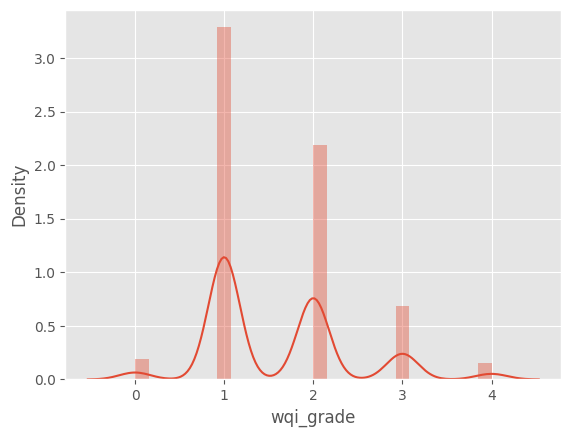

In [ ]:
# wqi_grade distribution
sns.distplot(df["wqi_grade"])
plt.show()

Model: LogisticRegression
Accuracy: 0.13
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.54      0.13      0.21       209
           2       0.00      0.00      0.00       129
           3       0.10      0.47      0.17        43
           4       0.02      0.60      0.04         5

    accuracy                           0.13       398
   macro avg       0.13      0.24      0.08       398
weighted avg       0.29      0.13      0.13       398

[[ 0  2  0  8  2]
 [ 0 27  0 96 86]
 [ 0 14  0 73 42]
 [ 0  7  0 20 16]
 [ 0  0  0  2  3]]


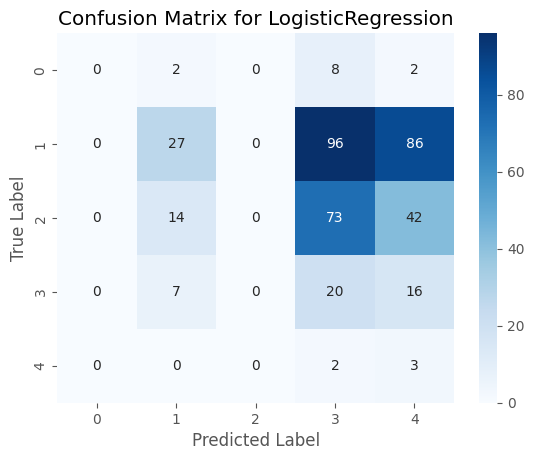

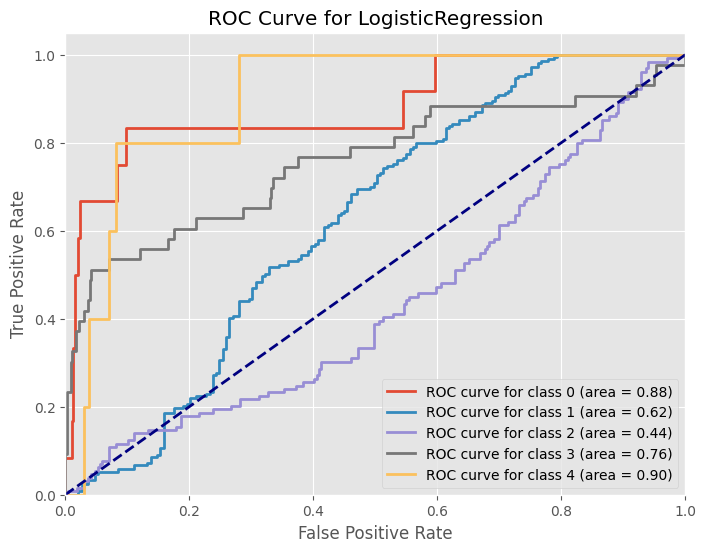

Model: KNeighborsClassifier
Accuracy: 0.62
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.67      0.80      0.73       209
           2       0.50      0.43      0.46       129
           3       0.65      0.40      0.49        43
           4       0.00      0.00      0.00         5

    accuracy                           0.62       398
   macro avg       0.56      0.46      0.50       398
weighted avg       0.61      0.62      0.61       398

[[  8   4   0   0   0]
 [  0 168  41   0   0]
 [  0  66  55   7   1]
 [  0  11  13  17   2]
 [  0   1   2   2   0]]


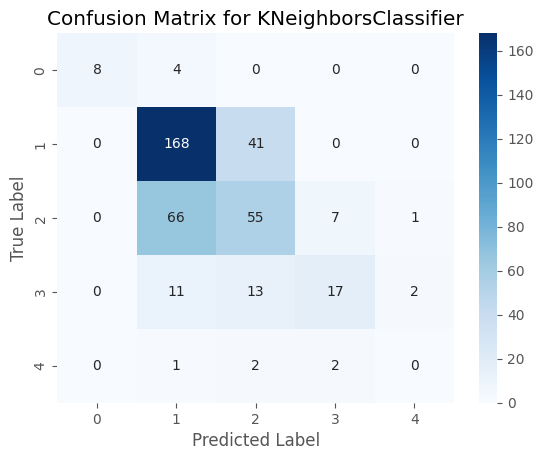

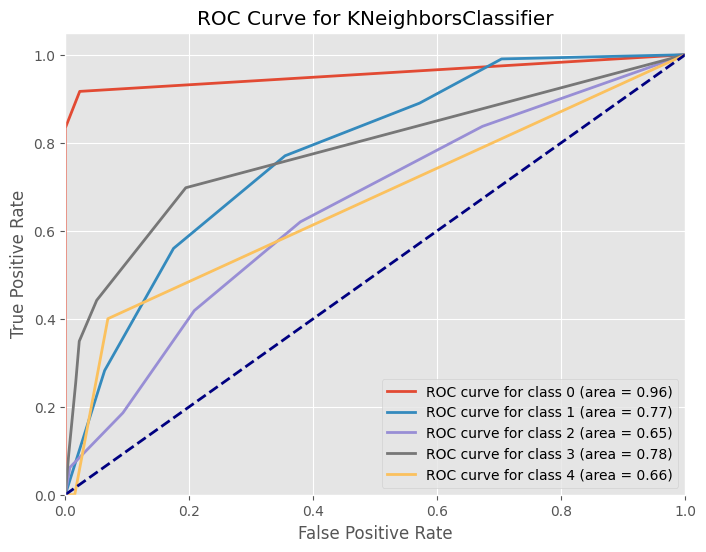

Model: GaussianNB
Accuracy: 0.35
              precision    recall  f1-score   support

           0       0.07      0.83      0.13        12
           1       0.52      0.49      0.50       209
           2       0.47      0.12      0.19       129
           3       0.63      0.28      0.39        43
           4       0.00      0.00      0.00         5

    accuracy                           0.35       398
   macro avg       0.34      0.34      0.24       398
weighted avg       0.49      0.35      0.37       398

[[ 10   2   0   0   0]
 [101 102   5   1   0]
 [ 30  79  15   5   0]
 [  6  14   9  12   2]
 [  0   1   3   1   0]]


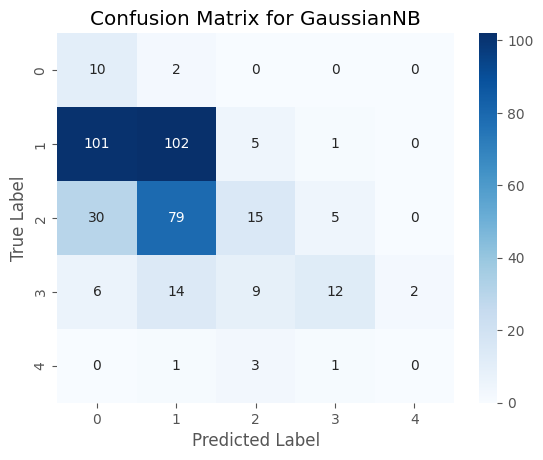

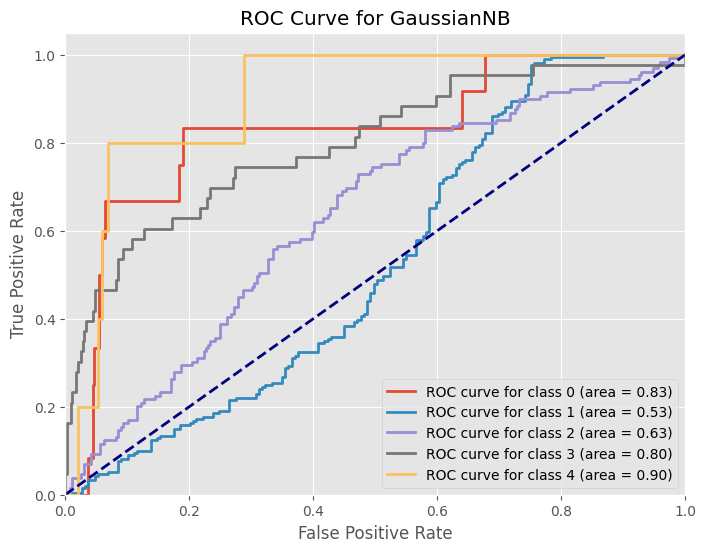

Model: SVC
Accuracy: 0.53
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.53      1.00      0.69       209
           2       0.00      0.00      0.00       129
           3       0.00      0.00      0.00        43
           4       0.00      0.00      0.00         5

    accuracy                           0.53       398
   macro avg       0.11      0.20      0.14       398
weighted avg       0.28      0.53      0.36       398

[[  0  12   0   0   0]
 [  0 209   0   0   0]
 [  0 129   0   0   0]
 [  0  43   0   0   0]
 [  0   5   0   0   0]]


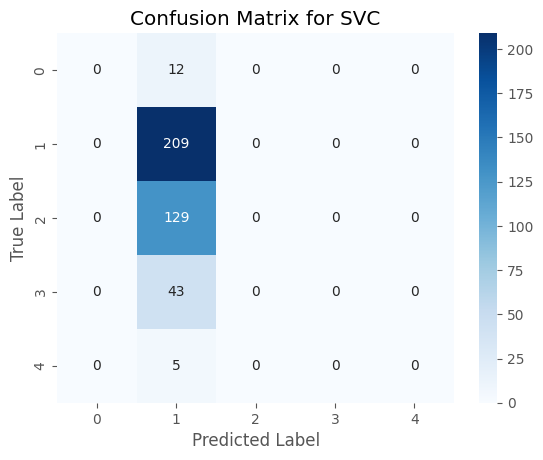

Model does not support probability estimates, cannot plot ROC curve.
Model: RandomForestClassifier
Accuracy: 0.93
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.95      0.98      0.97       209
           2       0.90      0.91      0.91       129
           3       0.87      0.79      0.83        43
           4       1.00      0.60      0.75         5

    accuracy                           0.93       398
   macro avg       0.95      0.82      0.87       398
weighted avg       0.93      0.93      0.93       398

[[ 10   2   0   0   0]
 [  0 205   4   0   0]
 [  0   8 118   3   0]
 [  0   0   9  34   0]
 [  0   0   0   2   3]]


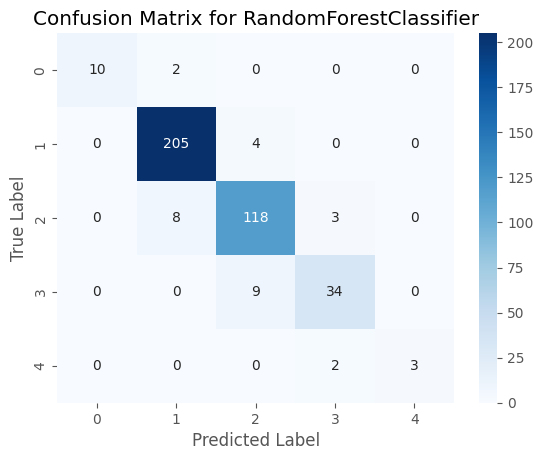

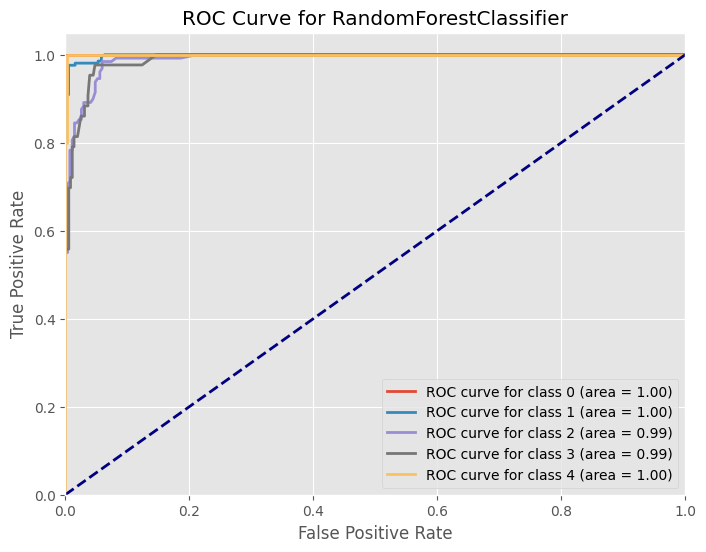

Model: DecisionTreeClassifier
Accuracy: 0.94
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.99      0.99      0.99       209
           2       0.93      0.91      0.92       129
           3       0.80      0.84      0.82        43
           4       0.80      0.80      0.80         5

    accuracy                           0.94       398
   macro avg       0.90      0.91      0.91       398
weighted avg       0.95      0.94      0.94       398

[[ 12   0   0   0   0]
 [  0 206   3   0   0]
 [  0   3 118   8   0]
 [  0   0   6  36   1]
 [  0   0   0   1   4]]


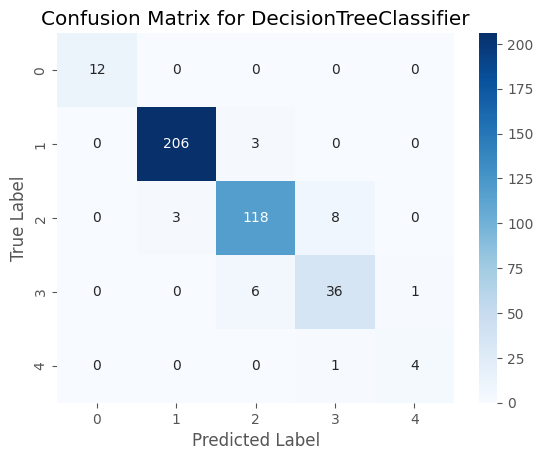

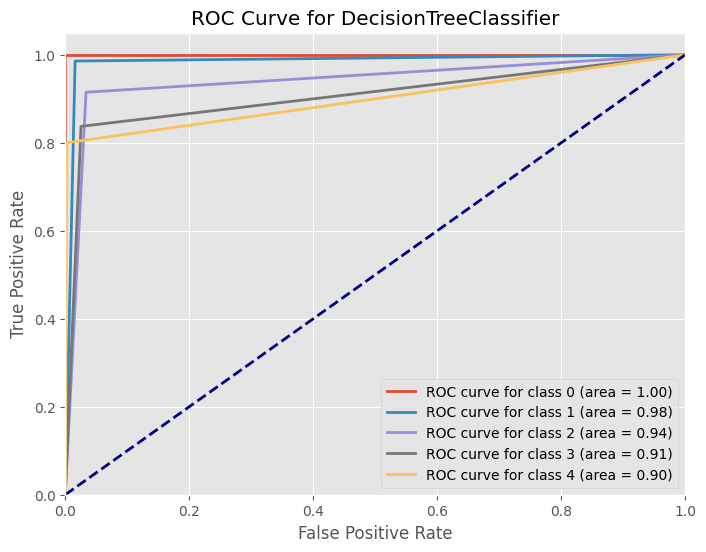

Best Model: DecisionTreeClassifier
DecisionTreeClassifier()


In [ ]:
# Create a classification model to predict "wqi_grade" from data in following column "do","ph","co","bod","na","fc","tc".
# Finding out the best performing one

# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Define the features and target variables
X = df[["do","ph","co","bod","na","fc","tc"]]
y = df["wqi_grade"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Train different classification models
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC(),
    RandomForestClassifier(),
    DecisionTreeClassifier()
]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure()
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix for {model.__class__.__name__}")
    plt.show()

    # Plot the ROC curve for each class
    if hasattr(model, "predict_proba"):
        plt.figure(figsize=(8, 6))
        y_score = model.predict_proba(X_test)
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(len(model.classes_)):
            fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i], pos_label=model.classes_[i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve for class {model.classes_[i]} (area = {roc_auc[i]:.2f})')

        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {model.__class__.__name__}')
        plt.legend(loc="lower right")
        plt.show()
    else:
        print("Model does not support probability estimates, cannot plot ROC curve.")

# Select the best performing model based on accuracy and other metrics
best_model = models[np.argmax([accuracy_score(y_test, model.predict(X_test)) for model in models])]

# Print the details of the best model
print(f"Best Model: {best_model.__class__.__name__}")
print(best_model)


# Best Model: DecisionTreeClassifier
# DecisionTreeClassifier()

In [ ]:
# save this to excel file and download

df.to_excel('output1.xlsx', sheet_name='sheet1', index=False)
files.download('output1.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy after hyperparameter tuning: 0.6834170854271356


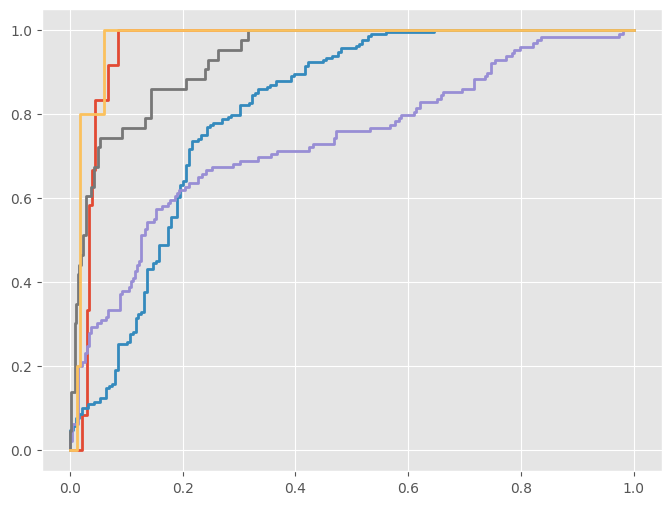

In [ ]:
# Improving the Logistic Regression performance using Grid Search to find the best performing Hyperparameter

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

# Perform grid search to find the best hyperparameters
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Train the model with the best hyperparameters
best_model = LogisticRegression(**grid_search.best_params_)
best_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after hyperparameter tuning:", accuracy)

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
y_score = best_model.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(best_model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i], pos_label=best_model.classes_[i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve for class {best_model.classes_[i]} (area = {roc_auc[i]:.2f})')


# Further optimization can be done by using other techniques like feature engineering, feature selection, etc.


# As we can, see, the Logistic Regression Accuracy went up from 0.13 to 0.68 with proper hyperparameter-tuning

Model: LogisticRegression
Accuracy: 0.98
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.99      0.99      0.99       209
           2       0.98      0.99      0.98       129
           3       1.00      0.98      0.99        43
           4       1.00      1.00      1.00         5

    accuracy                           0.98       398
   macro avg       0.99      0.96      0.97       398
weighted avg       0.99      0.98      0.98       398

[[ 10   2   0   0   0]
 [  0 207   2   0   0]
 [  0   1 128   0   0]
 [  0   0   1  42   0]
 [  0   0   0   0   5]]


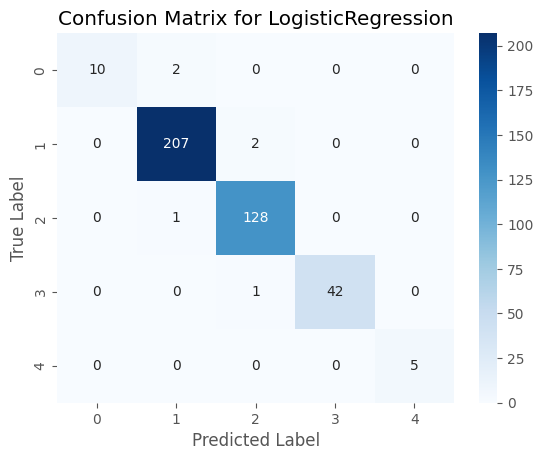

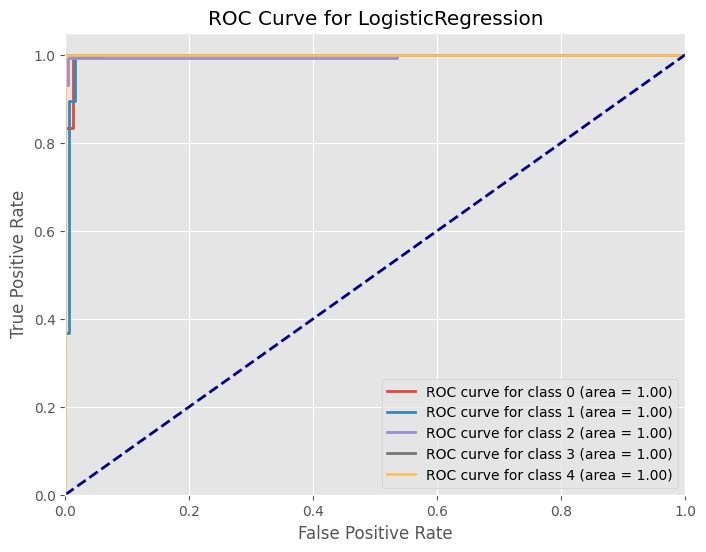

Model: KNeighborsClassifier
Accuracy: 0.93
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.96      0.98      0.97       209
           2       0.89      0.95      0.92       129
           3       0.89      0.74      0.81        43
           4       1.00      0.60      0.75         5

    accuracy                           0.93       398
   macro avg       0.95      0.79      0.85       398
weighted avg       0.93      0.93      0.93       398

[[  8   4   0   0   0]
 [  0 205   4   0   0]
 [  0   4 123   2   0]
 [  0   0  11  32   0]
 [  0   0   0   2   3]]


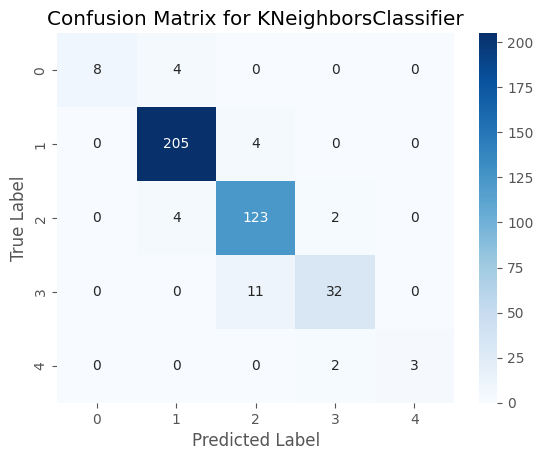

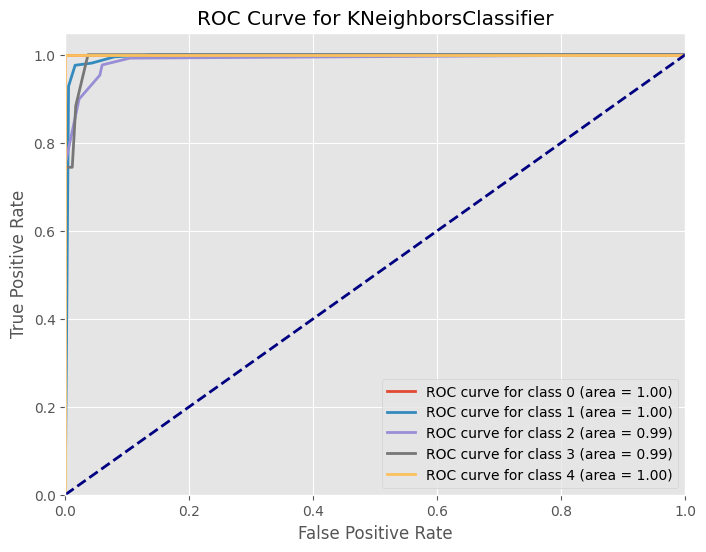

Model: GaussianNB
Accuracy: 0.47
              precision    recall  f1-score   support

           0       0.07      1.00      0.13        12
           1       0.85      0.22      0.35       209
           2       0.81      0.78      0.79       129
           3       0.60      0.70      0.65        43
           4       0.33      0.20      0.25         5

    accuracy                           0.47       398
   macro avg       0.53      0.58      0.43       398
weighted avg       0.78      0.47      0.52       398

[[ 12   0   0   0   0]
 [151  46  12   0   0]
 [  4   8 100  16   1]
 [  0   0  12  30   1]
 [  0   0   0   4   1]]


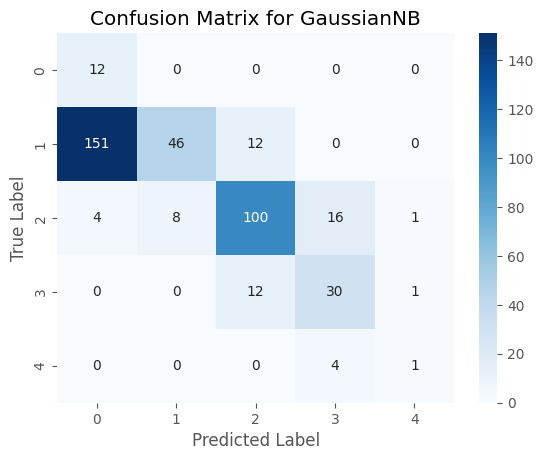

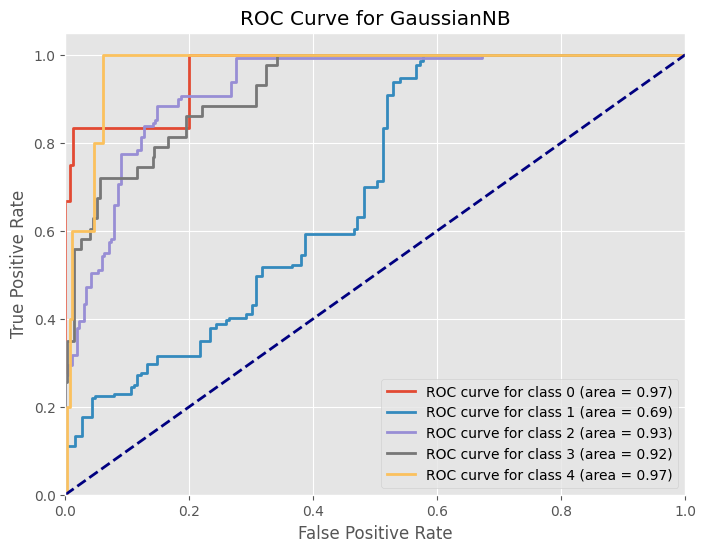

Model: SVC
Accuracy: 0.95
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.97      1.00      0.98       209
           2       0.92      0.96      0.94       129
           3       0.94      0.74      0.83        43
           4       1.00      0.60      0.75         5

    accuracy                           0.95       398
   macro avg       0.97      0.83      0.88       398
weighted avg       0.95      0.95      0.95       398

[[ 10   2   0   0   0]
 [  0 209   0   0   0]
 [  0   5 124   0   0]
 [  0   0  11  32   0]
 [  0   0   0   2   3]]


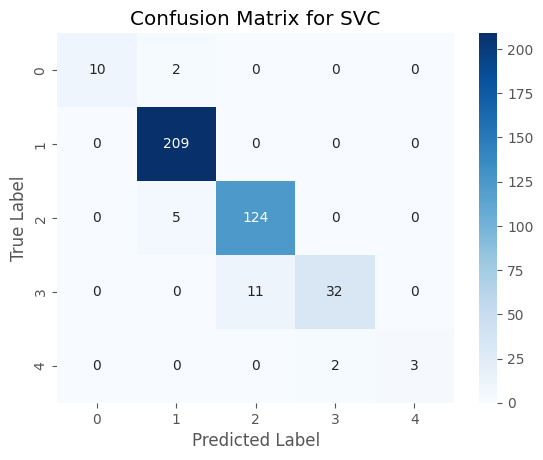

Model does not support probability estimates, cannot plot ROC curve.
Model: RandomForestClassifier
Accuracy: 0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.99      1.00      1.00       209
           2       0.96      0.98      0.97       129
           3       0.97      0.88      0.93        43
           4       1.00      0.80      0.89         5

    accuracy                           0.98       398
   macro avg       0.99      0.93      0.96       398
weighted avg       0.98      0.98      0.98       398

[[ 12   0   0   0   0]
 [  0 209   0   0   0]
 [  0   2 127   0   0]
 [  0   0   5  38   0]
 [  0   0   0   1   4]]


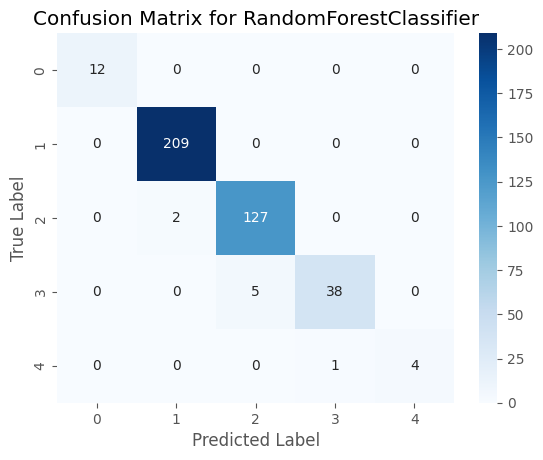

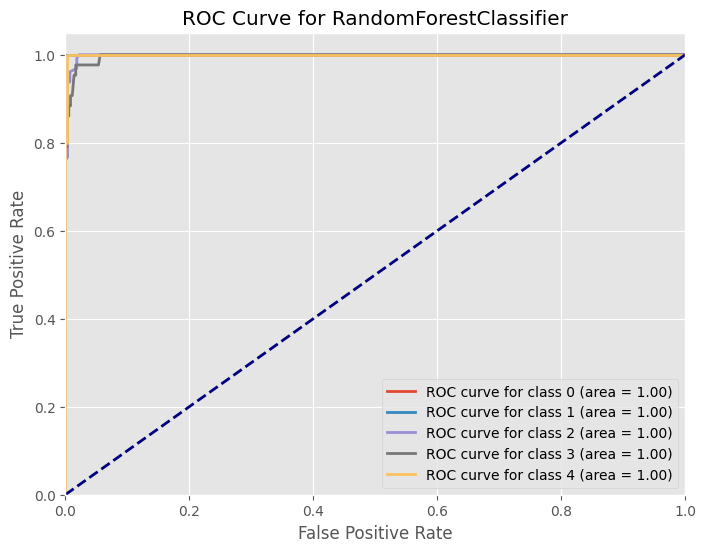

Model: DecisionTreeClassifier
Accuracy: 0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00       209
           2       0.97      0.98      0.98       129
           3       0.97      0.88      0.93        43
           4       0.83      1.00      0.91         5

    accuracy                           0.98       398
   macro avg       0.95      0.97      0.96       398
weighted avg       0.98      0.98      0.98       398

[[ 12   0   0   0   0]
 [  0 209   0   0   0]
 [  0   1 127   1   0]
 [  0   0   4  38   1]
 [  0   0   0   0   5]]


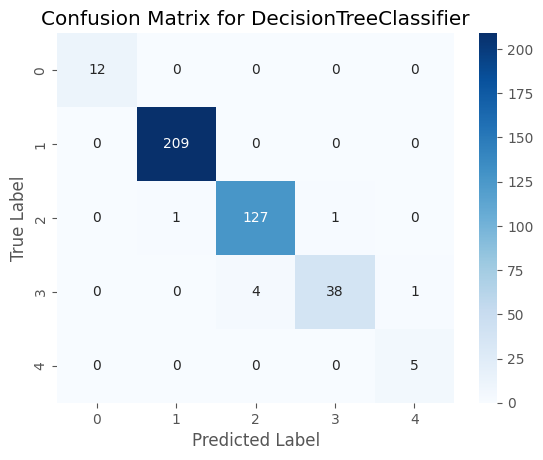

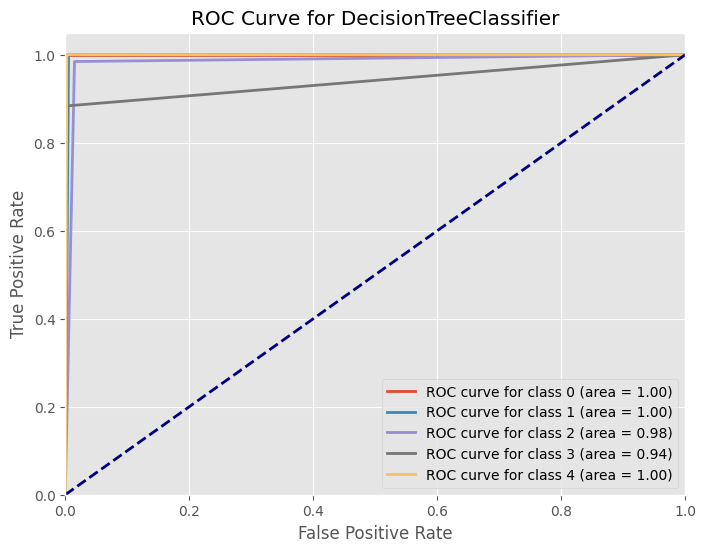

Best Model: LogisticRegression
LogisticRegression()


In [ ]:
# doing the same exact classification, but now we use the normalised data instead of the raw data and all the models performance improve drastically

import matplotlib.pyplot as plt
import numpy as np
# Define the features and target variables
X = df[["npH","ndo","nco","nfc","nbdo","nec","nna"]]
y = df["wqi_grade"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Train different classification models
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC(),
    RandomForestClassifier(),
    DecisionTreeClassifier()
]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure()
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix for {model.__class__.__name__}")
    plt.show()

    # Plot the ROC curve for each class
    if hasattr(model, "predict_proba"):
        plt.figure(figsize=(8, 6))
        y_score = model.predict_proba(X_test)
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(len(model.classes_)):
            fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i], pos_label=model.classes_[i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve for class {model.classes_[i]} (area = {roc_auc[i]:.2f})')

        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {model.__class__.__name__}')
        plt.legend(loc="lower right")
        plt.show()
    else:
        print("Model does not support probability estimates, cannot plot ROC curve.")

# Select the best performing model based on accuracy and other metrics
best_model = models[np.argmax([accuracy_score(y_test, model.predict(X_test)) for model in models])]

# Print the details of the best model
print(f"Best Model: {best_model.__class__.__name__}")
print(best_model)


# Next what we can do it, create prediction model with the help of yearly data to predict the following wqi using walk-forward window taught in class. But here, the problem is lack of data and every year has a bunch of data recorded at diffent time of year but listed as the same year. So what we can do is findout yearly mean, and use it for the prediction model

In [ ]:
yearly_wqi = df.groupby('year')['wqi'].mean()
df_year = yearly_wqi.reset_index()
df_year

,year,wqi
0,2003,66.678161
1,2004,61.290000
2,2005,75.748983
3,2006,75.262286
4,2007,75.948000
5,2008,74.531195
6,2009,75.442873
7,2010,77.278085
8,2011,78.669437
9,2012,80.195959


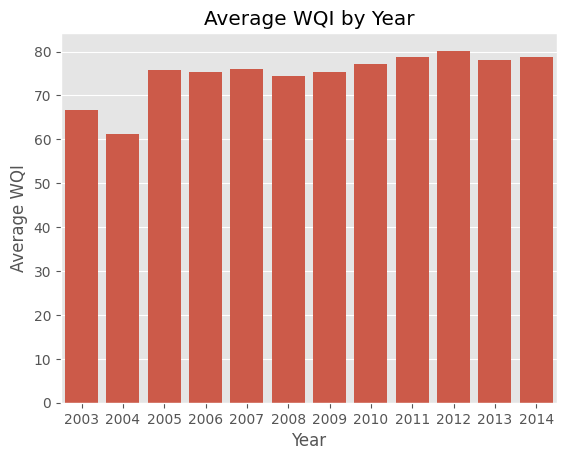

In [ ]:
# Create a bar chart of the average WQI for each year
sns.barplot(x='year', y='wqi', data=df_year)
plt.xlabel('Year')
plt.ylabel('Average WQI')
plt.title('Average WQI by Year')
plt.show()


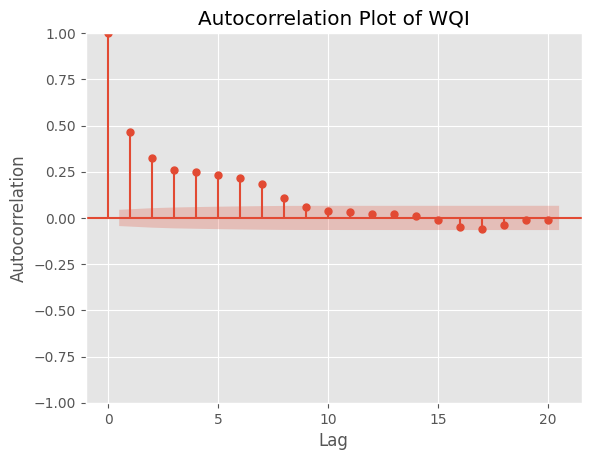

In [ ]:
import statsmodels.api as sm

# Create the autocorrelation plot
sm.graphics.tsa.plot_acf(df['wqi'], lags=20)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot of WQI')
plt.show()


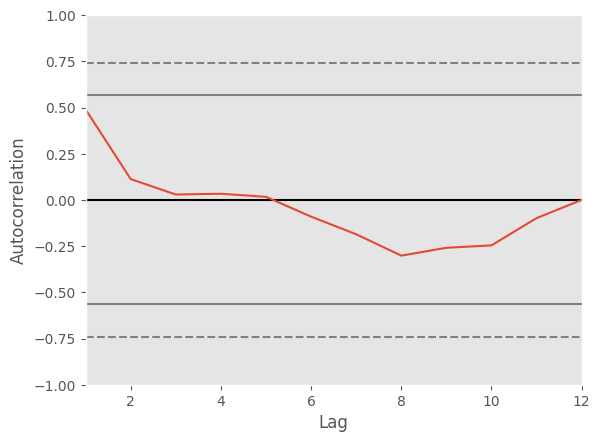

In [ ]:

from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(yearly_wqi)
pyplot.show()

#Next, we can do something alse with this WQI data, that is, WQI prediction model.

In [ ]:
yearly_wqi.values

array([66.67816092, 61.29      , 75.74898305, 75.26228571, 75.948     ,
       74.53119497, 75.44287293, 77.27808511, 78.66943723, 80.1959589 ,
       78.16362934, 78.80253061])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                                wqi   No. Observations:                   12
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 -32.030
Date:                            Thu, 25 Apr 2024   AIC                             74.061
Time:                                    14:58:58   BIC                             76.050
Sample:                                         0   HQIC                            72.807
                                             - 12                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9569      5.886     -0.163      0.871     -12.493      10.579
ma.L1          0.6026      2.127   

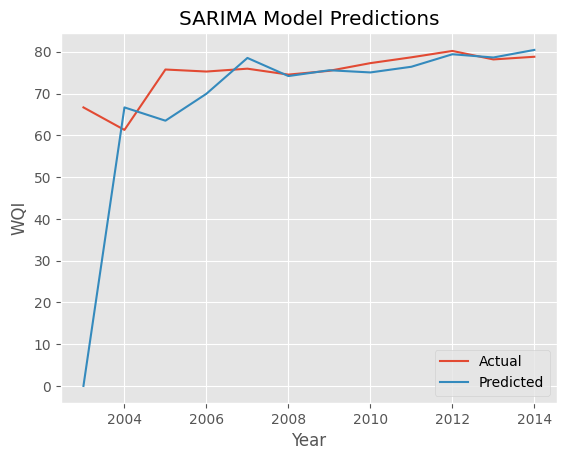

In [ ]:
# create a SARIMA model to predict yearly WQI along with the results

import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model
model = SARIMAX(yearly_wqi, order=(1, 1, 1), seasonal_order=(1, 0, 1, 12))
results = model.fit()

# Print the model summary
print(results.summary())

# Make predictions
predictions = results.predict(start=0, end=len(yearly_wqi) - 1)

# Plot the predictions
plt.plot(yearly_wqi, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Year')
plt.ylabel('WQI')
plt.title('SARIMA Model Predictions')
plt.legend()
plt.show()


#The models would have been better if the data points were spread out throughout the year for every year and more accurate, but still these many data points proves my points, that is, just like stock-market prediction, we can also predict WQI which, if properly scaled and deployed, might come in handy for effective pollution control in future